<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
dataset = pd.read_csv('/content/yahoofinance.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [86]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-25,191.509995,191.979996,186.600006,188.740005,186.301483,43845300
1,2019-03-26,191.660004,192.880005,184.580002,186.789993,184.376678,49800500
2,2019-03-27,188.750000,189.759995,186.550003,188.470001,186.034973,29848400
3,2019-03-28,188.949997,189.559998,187.529999,188.720001,186.281738,20780400
4,2019-03-29,189.830002,190.080002,188.539993,189.949997,187.495865,23564000


In [87]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,236.844229,239.629328,234.602332,237.338498,236.091135,3.164449e+07
std,43.534331,44.316390,43.064055,43.892846,44.482641,1.677487e+07
min,175.440002,177.919998,170.270004,173.300003,171.719727,1.136200e+07
25%,201.410004,203.529999,199.669998,201.750000,200.239075,2.114340e+07
50%,220.539993,222.490005,217.649994,220.699997,219.518402,2.655100e+07
75%,267.480011,271.000000,265.390015,268.480011,267.844330,3.480580e+07
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.067212e+08


In [88]:
apple_training = dataset.iloc[:,1:2].values
apple_training

array([[191.509995],
       [191.660004],
       [188.75    ],
       [188.949997],
       [189.830002],
       [191.639999],
       [191.089996],
       [193.25    ],
       [194.789993],
       [196.449997],
       [196.419998],
       [200.320007],
       [198.679993],
       [200.850006],
       [199.199997],
       [198.580002],
       [199.460007],
       [199.539993],
       [203.119995],
       [202.830002],
       [204.429993],
       [207.360001],
       [206.830002],
       [204.899994],
       [204.399994],
       [203.059998],
       [209.880005],
       [209.839996],
       [210.889999],
       [204.289993],
       [205.880005],
       [201.899994],
       [200.399994],
       [197.419998],
       [187.710007],
       [186.410004],
       [186.270004],
       [189.910004],
       [186.929993],
       [183.520004],
       [185.220001],
       [184.660004],
       [179.800003],
       [180.199997],
       [178.919998],
       [176.419998],
       [177.949997],
       [176.2

In [89]:
#minmax scaler

from sklearn.preprocessing import MinMaxScaler

minmax= MinMaxScaler(feature_range=(0,1))
apple_processed = minmax.fit_transform(apple_training)
apple_processed

array([[0.10763559],
       [0.10864034],
       [0.08914936],
       [0.09048892],
       [0.09638313],
       [0.10850635],
       [0.10482247],
       [0.11929002],
       [0.12960477],
       [0.14072335],
       [0.14052242],
       [0.16664439],
       [0.1556597 ],
       [0.17019428],
       [0.15914265],
       [0.15498997],
       [0.16088417],
       [0.16141991],
       [0.18539849],
       [0.18345614],
       [0.19417276],
       [0.21379773],
       [0.21024784],
       [0.19732079],
       [0.19397183],
       [0.18499664],
       [0.23067653],
       [0.23040855],
       [0.23744139],
       [0.19323505],
       [0.20388483],
       [0.17722702],
       [0.16718013],
       [0.14722035],
       [0.08218356],
       [0.07347624],
       [0.07253853],
       [0.09691898],
       [0.07695909],
       [0.05411924],
       [0.06550569],
       [0.06175487],
       [0.02920296],
       [0.03188209],
       [0.02330875],
       [0.00656394],
       [0.01681176],
       [0.005

In [90]:
#create the feature set with labels as output

feature_set = []
labels = []

for i in range(60,253):
  feature_set.append(apple_processed[i-60:i,0])
  labels.append(apple_processed[i,0])
labels

[0.16235762189076675,
 0.1669792029722066,
 0.15646351558983396,
 0.15472198832326778,
 0.15398521666324583,
 0.14956466038028093,
 0.16644335564179702,
 0.1556596977087501,
 0.18573341077562588,
 0.17394510440282152,
 0.18647018913357183,
 0.18693909071178227,
 0.1699263097060666,
 0.15914264507509546,
 0.1768922044387573,
 0.1866711201611082,
 0.18091089866664967,
 0.19189548762723296,
 0.1952444497182413,
 0.19162761754542146,
 0.19129270124254805,
 0.2032819386428888,
 0.18894838759129717,
 0.22116548997981167,
 0.2158740695947008,
 0.22404554379468533,
 0.21460145060426927,
 0.22116548997981167,
 0.22317478685932657,
 0.2744809061873468,
 0.2576021104569681,
 0.2015405185431094,
 0.1510382103982486,
 0.13978565088699146,
 0.13375755931072142,
 0.1658405692571121,
 0.17320832604487557,
 0.161955759835694,
 0.17133291397183514,
 0.18566647172135076,
 0.18767586906972822,
 0.19316811331558847,
 0.23563292583787754,
 0.23737445310444372,
 0.25150707312849896,
 0.2528466378711296,
 0.2

In [91]:
feature_set,labels=np.array(feature_set),np.array(labels)
feature_set.shape

(193, 60)

In [92]:
feature_set=np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],1))
feature_set.shape

(193, 60, 1)

In [93]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [94]:
model = Sequential()
model.add(LSTM(units=60,return_sequences=True,input_shape=(feature_set.shape[1],1)))

In [95]:
model.add(Dropout(0.20))

In [96]:
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.20))

In [97]:
model.add(LSTM(units=60))
model.add(Dropout(0.20))

In [98]:
model.add(Dense(units=1))

In [99]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [100]:
model.fit(feature_set,labels,epochs=100,batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.1562
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0349
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0267
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0153
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0283
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0235
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0161
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0157
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0128
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0123
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0125
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0125
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0089
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.0118
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0142
Epoch 16/100
7/7 

In [101]:
testing_data = dataset.iloc[:,1:2].values
test_features = testing_data

In [102]:
test_features=test_features.reshape(-1,1)
test_features=minmax.transform(test_features)

In [103]:
testing_features = []
for i in range(60,253):
  testing_features.append(test_features[i-60:i,0])


In [104]:
test_features=np.array(testing_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))

In [105]:
predictions = model.predict(test_features)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [ ]:
predictions


In [107]:
predictions=minmax.inverse_transform(predictions)

In [ ]:
predictions

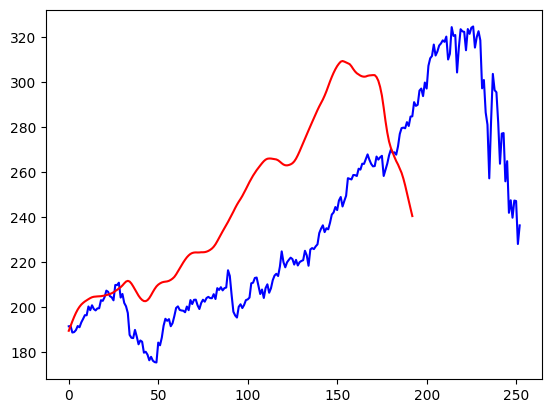

In [110]:
plt.figure()
plt.plot(testing_data,color='blue',label='Actual Apple Stock Price')
plt.plot(predictions,color='red',label='Predicted Apple Stock Price')